In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_11180\3923441609.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (http

In [3]:
# read bike data
fall19bs=gpd.read_file('D:/AT Census/Replica Data/Fall2019_saturday_ped_data/replica-test-03_22_23-network_link_layer.geojson')
fall19bs['season']='Fall'
fall19bs['year']=2019
fall19bs['mode']='ped'
fall19bs['avg_vol']=fall19bs['volume']/13
fall19bs['day']='Saturday'

fall19bth=gpd.read_file('D:/AT Census/Replica Data/Fall2019_Thursday_ped_data/replica-test-03_22_23-network_link_layer.geojson')
fall19bth['season']='Fall'
fall19bth['year']=2019
fall19bth['mode']='ped'
fall19bth['avg_vol']=fall19bth['volume']/13
fall19bth['day']='Thursday'

sp21bs=gpd.read_file('D:/AT Census/Replica Data/Spring2021_Saturday_ped_data/replica-test-03_22_23-network_link_layer.geojson')
sp21bs['season']='Spring'
sp21bs['year']=2021
sp21bs['mode']='ped'
sp21bs['avg_vol']=sp21bs['volume']/13
sp21bs['day']='Saturday'

sp21bth=gpd.read_file('D:/AT Census/Replica Data/Spring2021_Thursday_ped_data/replica-test-03_22_23-network_link_layer.geojson')
sp21bth['season']='Spring'
sp21bth['year']=2021
sp21bth['mode']='ped'
sp21bth['avg_vol']=sp21bth['volume']/13
sp21bth['day']='Thursday'

fall21bs=gpd.read_file('D:/AT Census/Replica Data/Fall2021_saturday_ped_data/replica-test-03_22_23-network_link_layer.geojson')
fall21bs['season']='Fall'
fall21bs['year']=2021
fall21bs['mode']='bike'
fall21bs['avg_vol']=fall21bs['volume']/13
fall21bs['day']='Saturday'

fall21bth=gpd.read_file('D:/AT Census/Replica Data/Fall2021_Thursday_ped_data/replica-test-03_22_23-network_link_layer.geojson')
fall21bth['season']='Fall'
fall21bth['year']=2021
fall21bth['mode']='ped'
fall21bth['avg_vol']=fall21bth['volume']/13
fall21bth['day']='Thursday'

In [4]:
# combine all bike replica data for fall 2019, spring 2021 and fall 2021
replica_ped_data=pd.concat([fall19bs,fall19bth,sp21bs,sp21bth,fall21bs,fall21bth],axis=0)
replica_ped_data.shape

(119994, 17)

In [5]:
replica_ped_data.head()

,networkLinkId,roadName,direction,startLat,endLat,startLon,endLon,highway,volume,distance,osmId,geometry,season,year,mode,avg_vol,day
0,9223372036854775807,San Diego Freeway,South,33.210441,33.210233,-117.387459,-117.387324,motorway,6459,0.016329,49015552,"LINESTRING (-117.38746 33.21044, -117.38732 33...",Fall,2019,ped,496.846154,Saturday
1,9223372036854775807,San Diego Freeway,South,33.207565,33.206981,-117.385640,-117.385318,motorway,6459,0.044360,32132976,"LINESTRING (-117.38564 33.20757, -117.38532 33...",Fall,2019,ped,496.846154,Saturday
2,9037505466697437000,San Diego Freeway,South,33.210233,33.207565,-117.387324,-117.385640,motorway,6459,0.208145,49015551,"LINESTRING (-117.38732 33.21023, -117.38564 33...",Fall,2019,ped,496.846154,Saturday
3,9223372036854775807,San Diego Freeway,North,33.206005,33.207675,-117.384195,-117.385315,motorway,6336,0.132402,32132974,"LINESTRING (-117.38420 33.20600, -117.38450 33...",Fall,2019,ped,487.384615,Saturday
4,8112738751967946000,San Diego Freeway,Northwest,33.205123,33.206005,-117.383352,-117.384195,motorway,6336,0.078063,32132935,"LINESTRING (-117.38335 33.20512, -117.38361 33...",Fall,2019,ped,487.384615,Saturday


In [6]:
replica_ped_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(replica_ped_data, crs=crs, geometry = 'geometry')
gdf.to_file("D:/AT Census/Replica Data/Replica_ped_data_analysis/replica_ped_data.json",DRIVER='GEOJSON')

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
replica_ped_data.shape,replica_ped_data['networkLinkId'].nunique()

((119994, 17), 25869)

<AxesSubplot: xlabel='day', ylabel='avg_vol'>

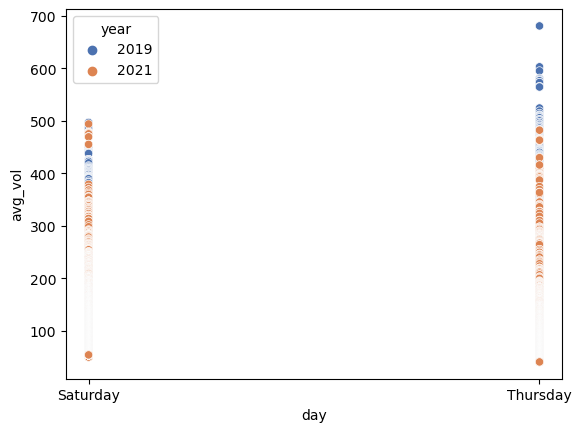

In [10]:
sns.scatterplot(data=replica_ped_data, x="day", y="avg_vol", hue="year",palette="deep")

In [11]:
repl_ped_data=pd.DataFrame({'replica_ave_vol':replica_ped_data.groupby(['networkLinkId','year','day'])['avg_vol'].mean()}).reset_index()
repl_ped_data.head()

,networkLinkId,year,day,replica_ave_vol
0,330511701583554,2021,Saturday,167.384615
1,330511701583554,2021,Thursday,87.538462
2,417852288208784,2021,Thursday,44.538462
3,1009249834613734,2019,Saturday,73.307692
4,1009249834613734,2021,Saturday,51.769231


<AxesSubplot: >

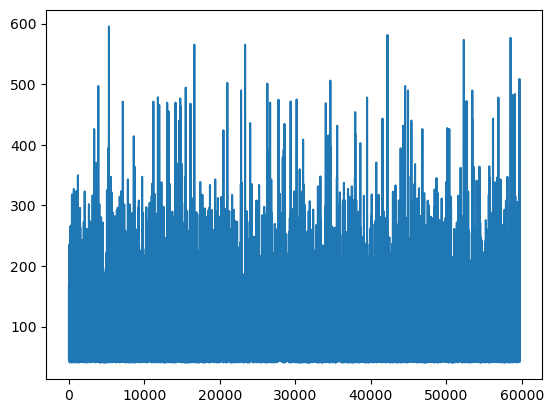

In [12]:
repl_ped_data['replica_ave_vol'].plot()

In [13]:
repl_ped_data.shape

(59716, 4)

In [19]:
# Now read eco bike data
eco_ped_data=pd.read_csv('D:/AT Census/Replica Data/eco_pedestrain_daily_volume_2022_2018_data_full_month.csv')
eco_ped_data.head()

,Unnamed: 0,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month,no_of_days_data_collected
0,0,572,2018,1,1,Monday,1,340.0,24,340.0,24,night,2.0,day,338.0,0,0,2018-01-01,31,31
1,1,572,2018,1,2,Tuesday,1,98.0,24,438.0,48,night,7.0,day,91.0,0,0,2018-01-02,31,31
2,2,572,2018,1,3,Wednesday,1,138.0,24,576.0,72,night,3.0,day,135.0,0,0,2018-01-03,31,31
3,3,572,2018,1,4,Thursday,1,89.0,24,665.0,96,night,7.0,day,82.0,0,0,2018-01-04,31,31
4,4,572,2018,1,5,Friday,1,57.0,24,722.0,120,night,5.0,day,52.0,0,0,2018-01-05,31,31


In [20]:
eco_ped_data19=eco_ped_data.loc[eco_ped_data['year']==2019]
eco_ped_data19_v1=eco_ped_data19[(eco_ped_data19['month']>8)& (eco_ped_data19['month']<12)]
eco_ped_data19_v1['season']='Fall'
eco_ped_data21=eco_ped_data.loc[eco_ped_data['year']==2021]
eco_ped_data21_v1=eco_ped_data21[(eco_ped_data21['month']>2)&(eco_ped_data21['month']<6)]
eco_ped_data21_v1['season']='Spring'
eco_ped_data21_v2=eco_ped_data21[(eco_ped_data21['month']>8)&(eco_ped_data21['month']<12)]
eco_ped_data21_v2['season']='Fall'
eco_ped_data=pd.concat([eco_ped_data21_v1,eco_ped_data21_v2,eco_ped_data19_v1],axis=0)

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_11180\1988858437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_ped_data19_v1['season']='Fall'
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_11180\1988858437.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_ped_data21_v1['season']='Spring'
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_11180\1988858437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [21]:
eco_ped_data19_v1['month'].unique()

array([ 9, 10, 11], dtype=int64)

In [22]:
eco_ped_data.head()

,Unnamed: 0,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,...,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month,no_of_days_data_collected,season
1155,1155,572,2021,3,1,Monday,9,77.0,24,255462.0,...,night,6.0,day,71.0,0,0,2021-03-01,31,31,Spring
1156,1156,572,2021,3,2,Tuesday,9,71.0,24,255533.0,...,night,4.0,day,67.0,0,0,2021-03-02,31,31,Spring
1157,1157,572,2021,3,3,Wednesday,9,69.0,24,255602.0,...,night,9.0,day,60.0,0,0,2021-03-03,31,31,Spring
1158,1158,572,2021,3,4,Thursday,9,76.0,24,255678.0,...,night,7.0,day,69.0,0,0,2021-03-04,31,31,Spring
1159,1159,572,2021,3,5,Friday,9,115.0,24,255793.0,...,night,7.0,day,108.0,0,0,2021-03-05,31,31,Spring


In [23]:
eco_ped_data1=pd.DataFrame({'eco_ave_vol':eco_ped_data.groupby(['ID','year','Day of Week'])['Daily_volume'].mean()}).reset_index()
eco_ped_data1=eco_ped_data1.rename(columns={'Day of Week':'day'})
eco_ped_data1.head()

,ID,year,day,eco_ave_vol
0,572,2019,Friday,159.538462
1,572,2019,Monday,146.307692
2,572,2019,Saturday,268.076923
3,572,2019,Sunday,291.923077
4,572,2019,Thursday,138.153846


<AxesSubplot: >

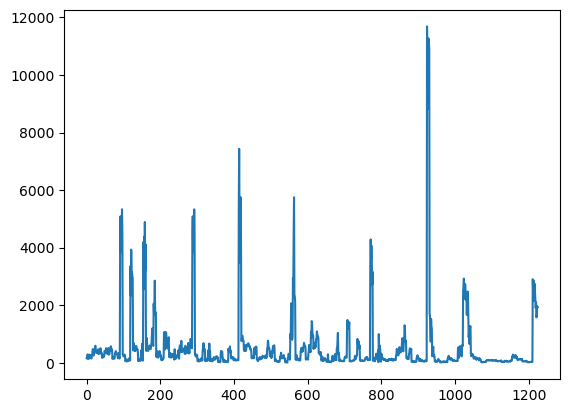

In [24]:
eco_ped_data1['eco_ave_vol'].plot()

In [25]:
# read bike counter data
bdata=pd.read_csv('D:/AT Census/Replica Data/ped_permanent_counter_2018_2022_MADT_Full_month_data.csv')
bdata1=bdata[(bdata['year']==2019) | (bdata['year']==2021)]
bdata2=bdata1.drop_duplicates(subset=['ID','latitude','longitude','year'], keep='first')
bdata2.to_csv('D:/AT Census/Replica Data/Replica_ped_data_analysis/ped_2019_2021_unique_counters.csv')

In [26]:
bdata2.shape

(211, 14)

In [27]:
# Now read eco_replica matching data
eco_replica=gpd.read_file('D:/AT Census/Replica Data/Replica_ped_data_analysis/ec_replica_ped_matched_data.shp')
eco_replica1=eco_replica[['ID','networkLin','geometry']]
eco_replica2=eco_replica1.rename(columns={'networkLin':'networkLinkId'})
eco_replica2.head()

,ID,networkLinkId,geometry
0,3576,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
1,3576,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
2,3611,8290666550027254000,POINT Z (-117.15992 32.71566 0.00000)
3,3610,8290666550027254000,POINT Z (-117.15951 32.71572 0.00000)
4,3610,8290666550027254000,POINT Z (-117.15951 32.71572 0.00000)


In [28]:
eco_replica.columns

Index(['Join_Count', 'TARGET_FID', 'Field1', 'Unnamed__0', 'ID', 'location',
       'latitude', 'longitude', 'year', 'month', 'MTT', 'days_in_mo',
       'Simple_MAD', 'AASHTO_MAD', 'diff', 'type', 'networkLin', 'roadName',
       'direction', 'startLat', 'endLat', 'startLon', 'endLon', 'highway',
       'volume', 'distance', 'osmId', 'season', 'mode', 'avg_vol', 'day',
       'geometry'],
      dtype='object')

In [29]:
eco_replica2['networkLinkId']=eco_replica2['networkLinkId'].astype(np.int64)

In [30]:
eco_ped_data1.shape,eco_replica.shape

((1225, 4), (28, 32))

In [31]:
# Combine with eco data
eco_ped_data2=pd.merge(eco_ped_data1, eco_replica2, on=['ID'], how='inner')
eco_ped_data2.head()

,ID,year,day,eco_ave_vol,networkLinkId,geometry
0,3576,2019,Friday,54.076923,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
1,3576,2019,Friday,54.076923,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
2,3576,2019,Monday,86.307692,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
3,3576,2019,Monday,86.307692,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
4,3576,2019,Saturday,137.384615,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)


In [32]:
eco_ped_data2.shape

(245, 6)

In [33]:
eco_replica_ped_data2=pd.merge(eco_ped_data2,repl_ped_data,on=['networkLinkId','year','day'], how='inner')
eco_replica_ped_data2.shape

(54, 7)

In [34]:
eco_replica_ped_data2.head()

,ID,year,day,eco_ave_vol,networkLinkId,geometry,replica_ave_vol
0,3576,2019,Saturday,137.384615,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000),118.880004
1,3576,2019,Saturday,137.384615,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000),118.880004
2,7551,2019,Saturday,477.692308,9223372036854775807,POINT Z (-121.72806 38.55743 0.00000),118.880004
3,7551,2019,Saturday,477.692308,9223372036854775807,POINT Z (-121.72806 38.55743 0.00000),118.880004
4,21712,2019,Saturday,359.800000,9223372036854775807,POINT Z (-122.45797 37.80232 0.00000),118.880004


In [35]:
d19=eco_replica_ped_data2.loc[eco_replica_ped_data2['year']==2019]
d19.shape

(22, 7)

In [36]:
d19['ID'].nunique()

6

<AxesSubplot: xlabel='replica_ave_vol', ylabel='eco_ave_vol'>

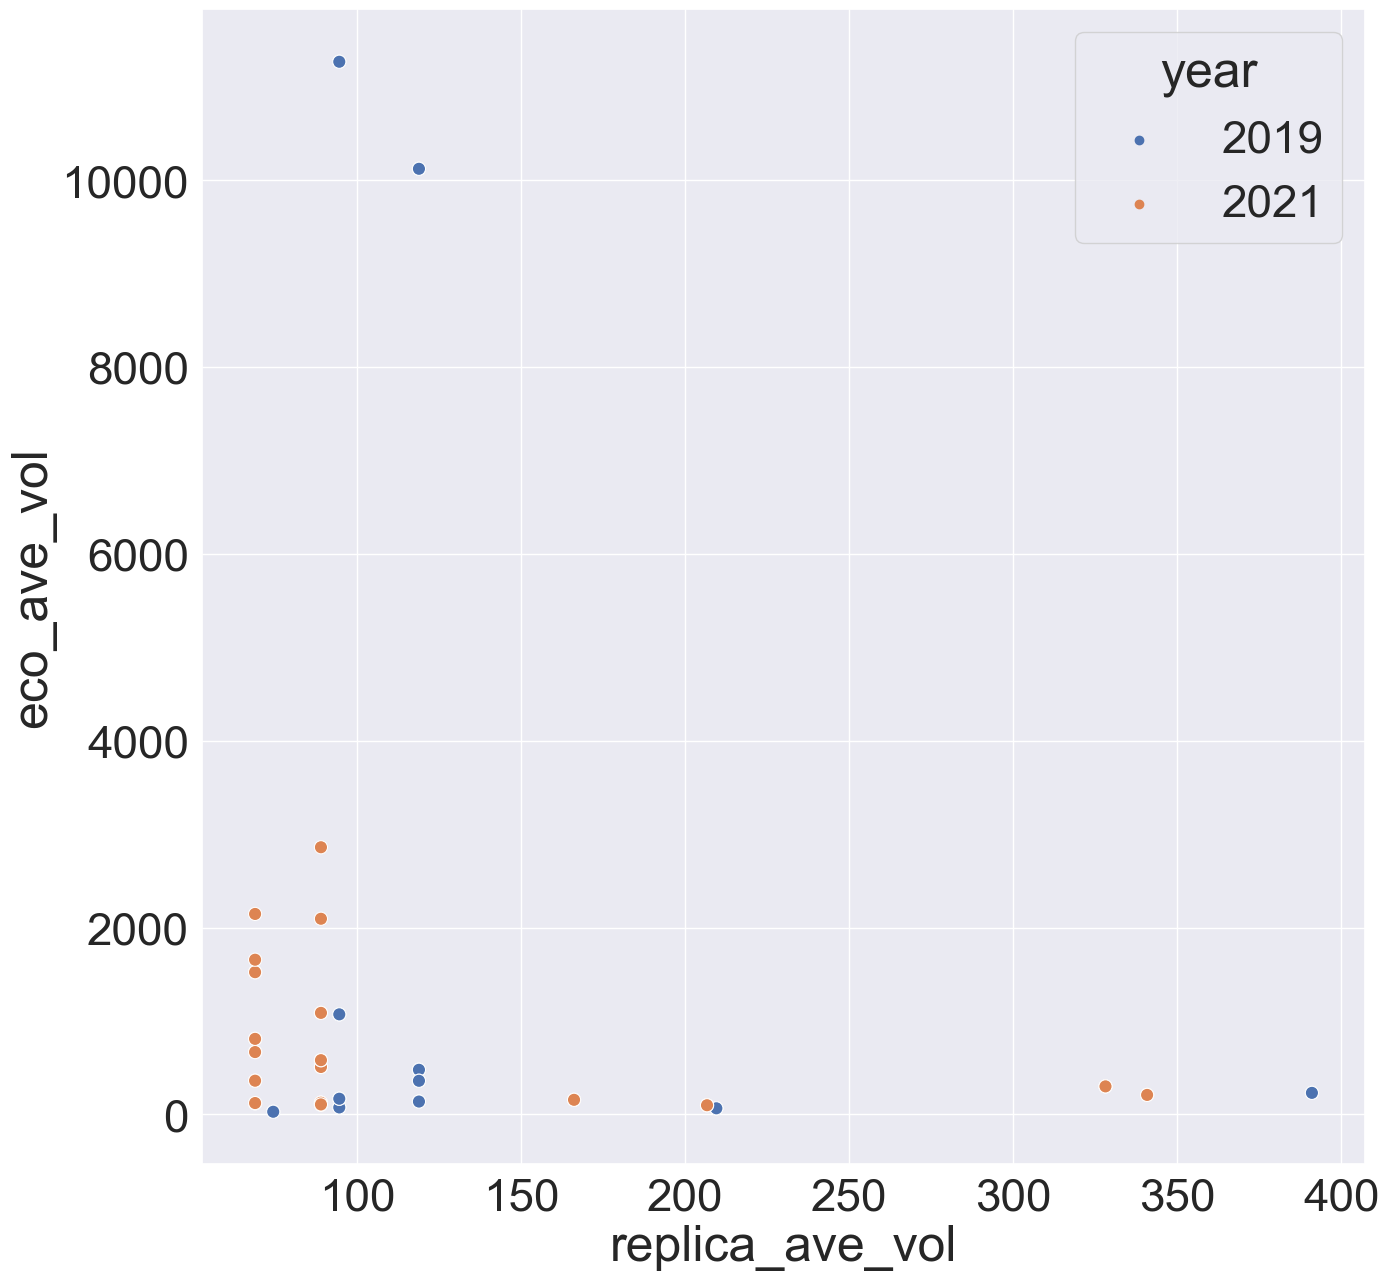

In [37]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=3.0)
sns.scatterplot(data=eco_replica_ped_data2, x="replica_ave_vol", y="eco_ave_vol", hue="year", palette="deep",s=90)

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


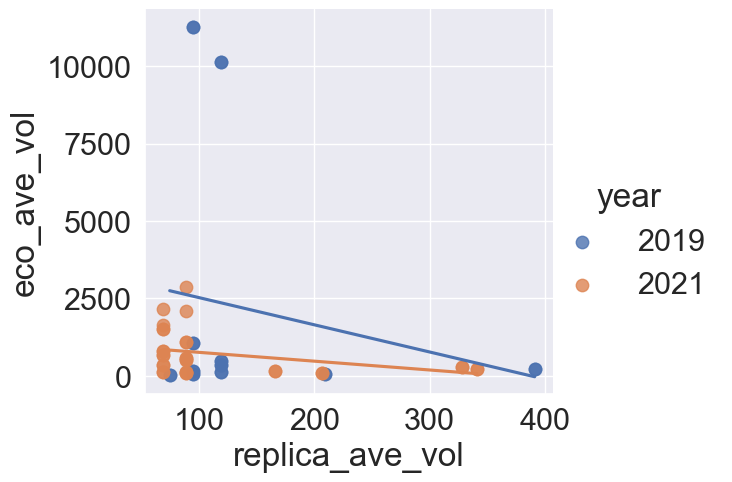

In [61]:

sns.lmplot(x="replica_ave_vol", y="eco_ave_vol",data=eco_replica_ped_data2, hue="year", palette="deep",ci=None, scatter_kws={"s": 80})

<AxesSubplot: xlabel='replica_ave_vol', ylabel='eco_ave_vol'>

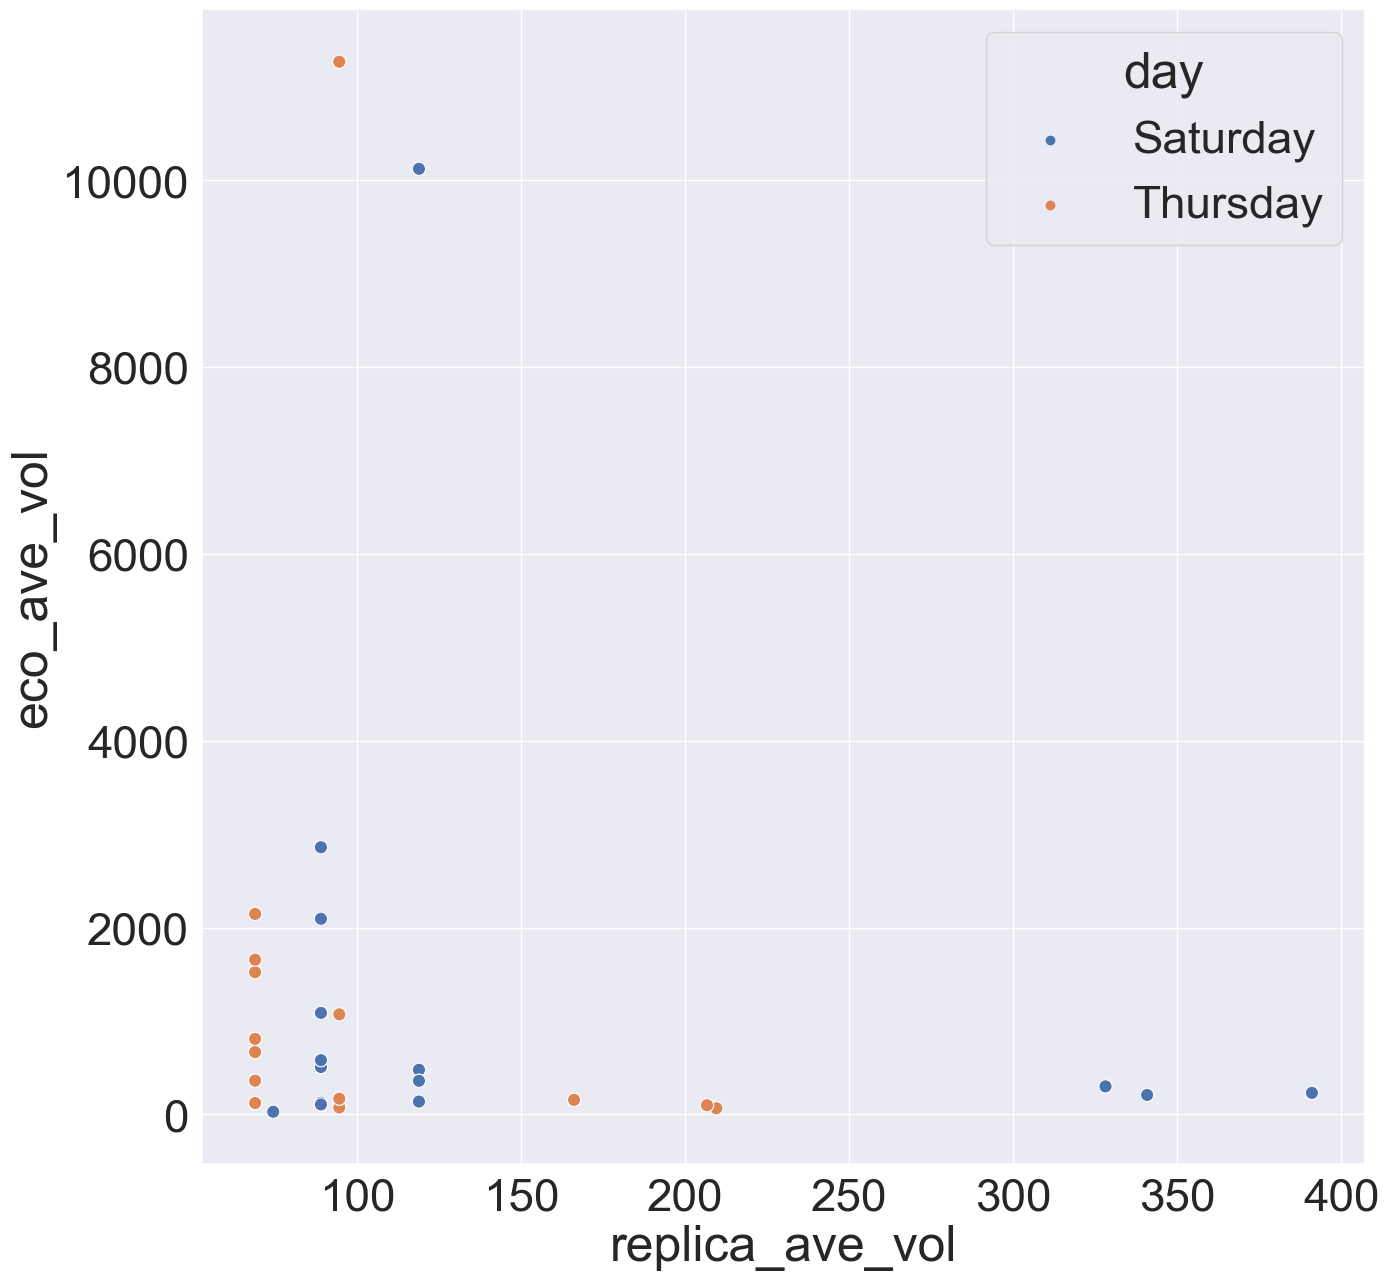

In [39]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=3.0)
sns.scatterplot(data=eco_replica_ped_data2, x="replica_ave_vol", y="eco_ave_vol", hue="day", palette="deep",s=90)

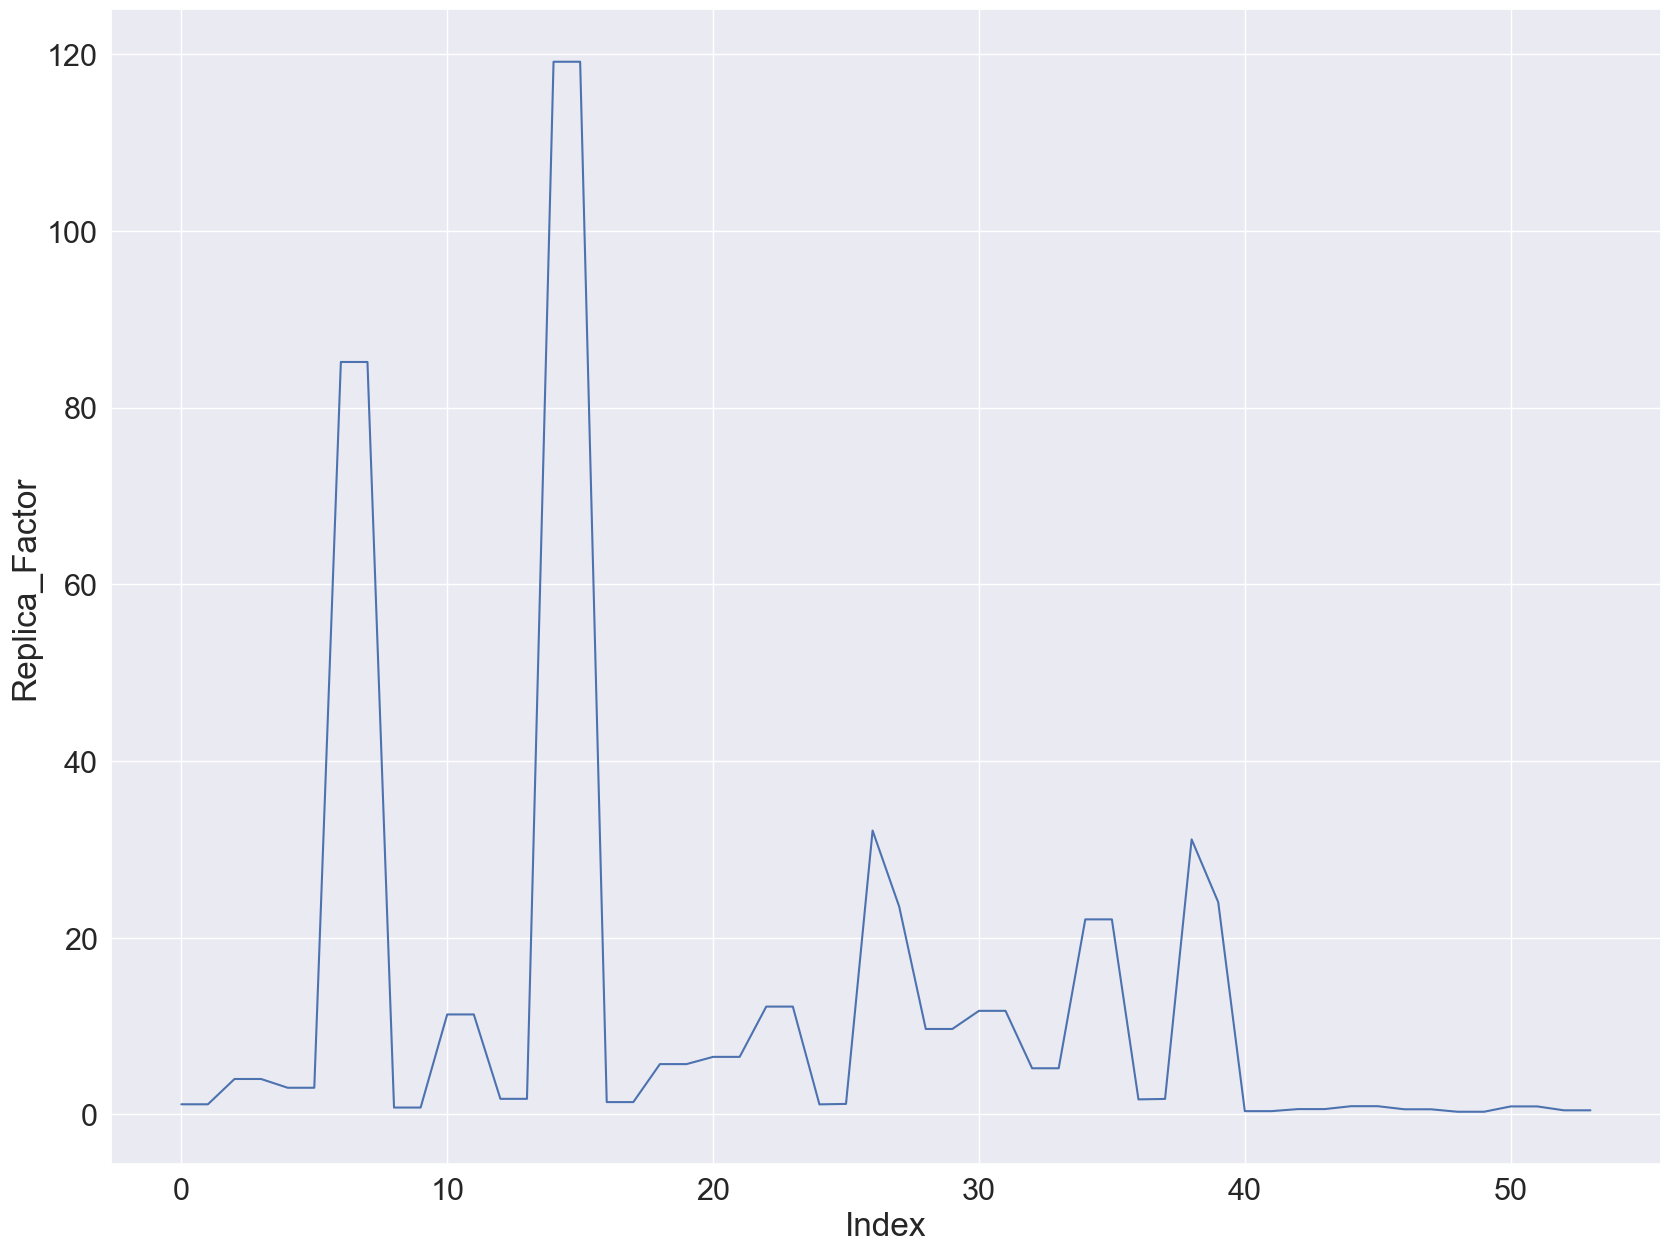

In [60]:
fig = plt.figure(figsize=(20,15))
eco_replica_ped_data2['factor']=eco_replica_ped_data2['eco_ave_vol']/eco_replica_ped_data2['replica_ave_vol']
eco_replica_ped_data2['factor'].plot()
plt.xlabel('Index')
plt.ylabel('Replica_Factor')
plt.rcParams.update({'font.size': 1000})
plt.show()

In [43]:
eco_replica_ped_data2['factor'].describe()

count     54.000000
mean      13.463379
std       26.959524
min        0.310736
25%        0.920342
50%        3.026581
75%       11.629775
max      119.146921
Name: factor, dtype: float64

# end of the coding